In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
data = pd.read_csv("Documents/Python/week 7/house_prices.csv")
data
int_col = ['Id', 'MSSubClass']

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
# int64 columns
int_columns = ["OverallQual", "OverallCond", "BsmtFullBath", "BsmtHalfBath", 
"FullBath", "HalfBath", "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars"]

# datetime columns
datetime_columns = ["YearBuilt", "YearRemodAdd", "GarageYrBlt", "MoSold", "YrSold"]
# the fact is columns only contain year or month, we can treat this as integer later

# float64 columns
float_columns = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1",
"BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF",
"GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", 
"3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"]

# ordinal columns (dtype is equal to object/categoric, but these are actually ordinal features)
ordinal_columns = ["BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1",
"BsmtFinType2", "HeatingQC", "CentralAir", "KitchenQual", "GarageFinish",
"GarageQual", "GarageCond", "PavedDrive", "PoolQC", "Fence"]

# categorical columns
obj_columns = ["MSSubClass", "MSZoning", "Alley", "Street", "LotShape", "LandContour",
"Utilities", "LotConfig", "LandSlope", "Neighborhood", "Condition1", 
"Condition2", "BldgType", "HouseStyle", "OverallQual", "RoofStyle",
"RoofMatl", "Exterior1st", "Exterior2nd", "MasVnrType", "ExterQual",
"ExterCond", "Foundation", "Heating", "Electrical", "Functional", "FireplaceQu", 
"GarageType", "MiscFeature", "SaleType", "SaleCondition"]

# target column
target_column = ["SalePrice"]

In [5]:
#check missing value
missing = data.isnull().sum()[data.isnull().sum()>0]
missing

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [6]:
#buat menjadi dataframe
missing_house_price = pd.DataFrame({"NaN_Count" : missing, "Percentage" : missing / len(data) *100}).sort_values(by = 'Percentage', ascending=False)
missing_house_price

,NaN_Count,Percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageType,81,5.547945
GarageYrBlt,81,5.547945
GarageFinish,81,5.547945


Berdasarkan sumber tersebut, informasi terkait NA yang dikumpulkan adalah sebagai berikut:

* NA value in "PoolQC" column means **no pool**. It doesn't mean **missing value**

* NA value in "MiscFeature" column means **no additional house feature**. It doesn't mean **missing value**

* NA value in "Alley" column means **no alley connected to house**. It doesn't mean **missing value**

* NA value in "Fence" column means **the house has no fence**. It doesn't mean **missing value**

* NA value in "Fireplaces" column means **the house has no fireplace**. It doesn't mean **missing value**

* NA value in "FireplaceQu" column means **No Fire Place**. It doesn't mean **missing value**

* no explanation about NA value for "LotFrontage". Thus, we enact this as **missing value**

* NA value in "GarageType" column means **the house has no garage**. It doesn't mean **missing value**

* since the house with **no garage** would also has no information about "GarageFinish", "GarageYrBlt, "GarageQual", and "GarageCond", the NA value should not considered as **missing value**.

* NA value in "BsmtQual", "BsmtFinType2", "BsmtinType1", "BsmtCond", and "BsmtExposure" columns means **the house has no garage**. It doesn't mean **missing value**.

* NA value in "MasVnrType" and "VasVnrArea" columns means **the house has no masonry veneer**. It doesn't mean **missing value**

* no explanation about NA value for "Electrical". Thus, we enact this as **missing value**


In [7]:
legit_na_col = ["MasVnrArea", "MasVnrType", "BsmtExposure", "BsmtCond", "BsmtFinType1", 
            "BsmtFinType2", "BsmtQual", "GarageCond", "GarageQual", 
            "GarageFinish", "GarageType", "Fireplaces", "Fence", "Alley", "MiscFeature", 
            "PoolQC", "GarageYrBlt", "FireplaceQu"]

print(f"Jumlah kolom yang termasuk legit NA adalah: {len(legit_na_col)}")

Jumlah kolom yang termasuk legit NA adalah: 18


In [8]:
#kolom bertipe num
num_legit_na = [i for i in data[legit_na_col].columns if data[i].dtypes in ["int", "float"]]

print(f"jumlah kolom bertipe data numerik adalah: {len(num_legit_na)}")

jumlah kolom bertipe data numerik adalah: 2


In [9]:
#kolom bertipe kategori
cat_legit_na = [i for i in data[legit_na_col].columns if data[i].dtypes == 'object']
print(f"jumlah kolom bertipe data kategorikal adalah: {len(cat_legit_na)}")

jumlah kolom bertipe data kategorikal adalah: 15


In [10]:
#GarageYrBlt adalah datetime jadi cara handle lebih baik adalah menghapusnya
num_legit_na.remove('GarageYrBlt')

#drop missing value GarageYrBlt
data.dropna(subset = ['GarageYrBlt'], inplace = True)

In [11]:
data[num_legit_na] = data[num_legit_na].fillna(0)
data[num_legit_na].isna().sum()

MasVnrArea    0
dtype: int64

In [12]:
data['GarageYrBlt'].isna().sum()

0

In [13]:
#mengisi nilai NaN pada categori dengan 'not exist'
data[cat_legit_na] = data[cat_legit_na].fillna('not exist')
data[cat_legit_na].isna().sum()

MasVnrType      0
BsmtExposure    0
BsmtCond        0
BsmtFinType1    0
BsmtFinType2    0
BsmtQual        0
GarageCond      0
GarageQual      0
GarageFinish    0
GarageType      0
Fence           0
Alley           0
MiscFeature     0
PoolQC          0
FireplaceQu     0
dtype: int64

In [14]:
#check missing value
missing = data.isnull().sum()[data.isnull().sum()>0]
missing_percentage = pd.DataFrame({"NaN_Count" : missing, "Percentage" : missing / len(data) *100}).sort_values(by = 'Percentage', ascending=False)
missing_percentage

,NaN_Count,Percentage
LotFrontage,252,18.274112
Electrical,1,0.072516


In [15]:
data.LotFrontage.describe()

count    1127.000000
mean       70.683230
std        24.261598
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

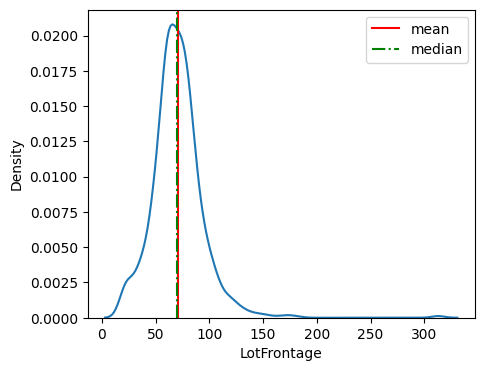

In [16]:
#coba visualisasikan
plt.figure(figsize = (5, 4))

sns.kdeplot(data=data, x='LotFrontage')

plt.axvline(x=data.LotFrontage.mean(), color='r', linestyle='-', label='mean')

plt.axvline(x=data.LotFrontage.median(), color='green', linestyle='-.', label='median')

plt.legend()

plt.show()

In [17]:
#median dan mean jaraknya cukup dekat. Namun, karena grafik menunjukkan data yang agak skewed ke kanan maka sebaiknya digunakan median
data['LotFrontage'] = data['LotFrontage'].fillna(data['LotFrontage'].median())

In [18]:
#check missing value
missing = data.isnull().sum()[data.isnull().sum()>0]
missing_percentage = pd.DataFrame({"NaN_Count" : missing, "Percentage" : missing / len(data) *100}).sort_values(by = 'Percentage', ascending=False)
missing_percentage

,NaN_Count,Percentage
Electrical,1,0.072516


In [19]:
#karena hanya ada 1 missing value, opsi hapus lebih baik
data.dropna(subset='Electrical', inplace=True)

In [20]:
#check missing value
missing = data.isnull().sum()[data.isnull().sum()>0]
missing_percentage = pd.DataFrame({"NaN_Count" : missing, "Percentage" : missing / len(data) *100}).sort_values(by = 'Percentage', ascending=False)
missing_percentage

,NaN_Count,Percentage


In [21]:
#karena sudah tidak ada outlier selanjutnya kita berurusan dengan outlier
#identifikasi terlebih dahulu outlier
colnames = int_columns+float_columns

data.reset_index(drop=True, inplace=True)

In [22]:
#minimal subplot row to make if 3 column
import math
print(math.ceil(len(colnames)/3))

10


C:\Users\ASUS\AppData\Local\Temp\ipykernel_5668\2072848140.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


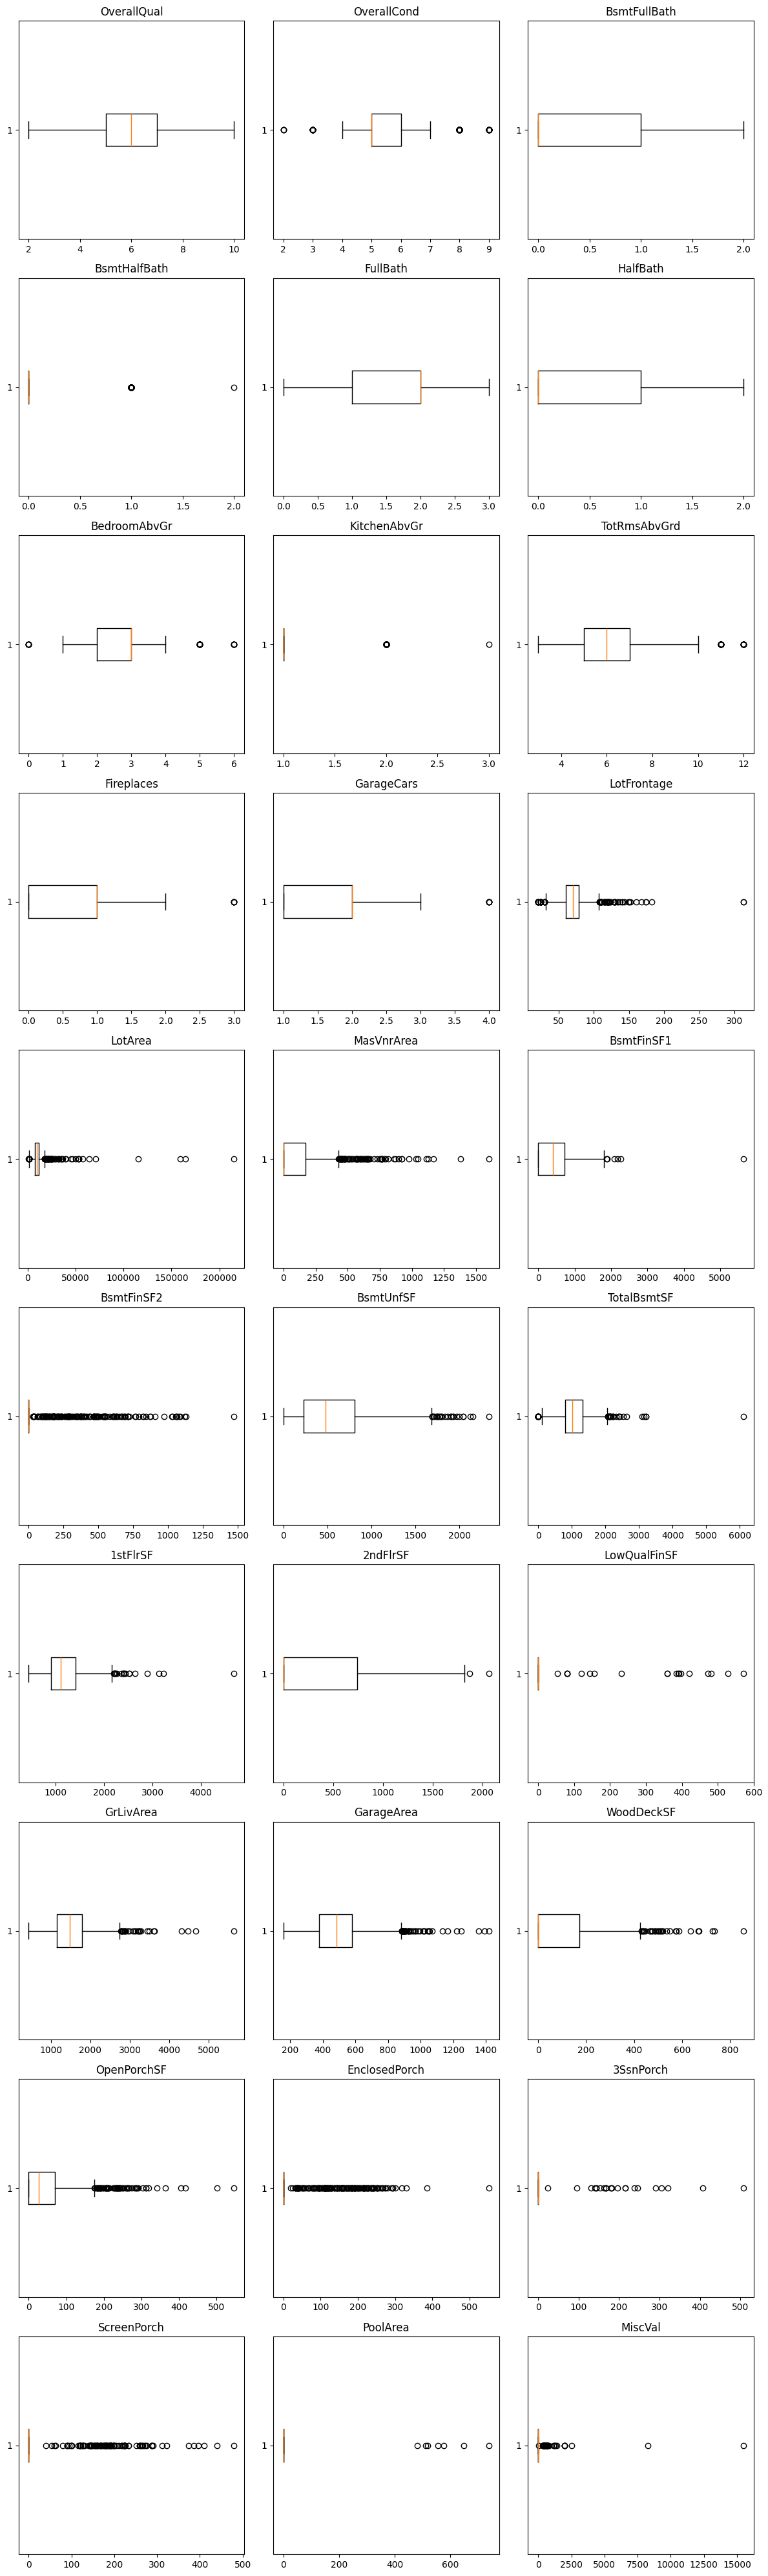

In [23]:
#membuat subplot dengan 10x3 grid dan ukuran 12x40
fig, ax = plt.subplots(10, 3, figsize=(12, 40))

#counter untuk akses colnames
count = 0

#loop untuk grids
for i in range(11):
    
    if count >= 30:
        break
        
    for j in range (3):
        if count >= 30:
            break

        #bikin boxplot
        ax[i, j].boxplot(data[colnames[count]], vert=False)
        ax[i, j].set_title(str(colnames[count]), fontdict={'fontsize': 12})

        #agar tidak infinite loop, bikin increment untuk counter
        count+=1

#agar tidak overlapping
fig.tight_layout()

#tampilkan grafik
fig.show()

In [24]:
# bikin fungsi untuk deteksi outlier pake IQR
def detect_outliers_iqr(data):

    # list inisial untuk outlier
    outliers = []

    # sort data 
    data = sorted(data)

    # menghitung Q1
    q1 = np.percentile(data, 25)

    # menghitung Q3
    q3 = np.percentile(data, 75)

    # menghitung IQR
    IQR = q3-q1

    # set lower bound
    ## note that we can play with value 1.5 to widen or narrow the range
    lwr_bound = q1-(1.5*IQR)

    # set upper bound
    ## note that we can play with value 1.5 to widen or narrow the range
    upr_bound = q3+(1.5*IQR)

    # print lower and upper bound yang sudah dihitung
    print(f"lower: {lwr_bound} upper: {upr_bound}")

    # tentukan apakah di bawah batas bawah atau melebihi batas atas
    for i in data:

        if (i<lwr_bound or i>upr_bound):

            outliers.append(i)

    return outliers

In [25]:
# membuat colom yang mengandung outlier (dari boxplot)
outlier_columns = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", 
"2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", 
"PoolArea", "MiscVal"]

In [26]:
for col in outlier_columns:

    outlier = detect_outliers_iqr(data[col])

    print("number of outliers in column", f"'{str(col)}'", "is", len(outlier))
    print()

lower: 31.5 upper: 107.5
number of outliers in column 'LotFrontage' is 98

lower: 1782.125 upper: 17671.125
number of outliers in column 'LotArea' is 79

lower: -256.125 upper: 426.875
number of outliers in column 'MasVnrArea' is 86

lower: -1098.0 upper: 1830.0
number of outliers in column 'BsmtFinSF1' is 6

lower: 0.0 upper: 0.0
number of outliers in column 'BsmtFinSF2' is 163

lower: -647.75 upper: 1686.25
number of outliers in column 'BsmtUnfSF' is 26

lower: 54.625 upper: 2069.625
number of outliers in column 'TotalBsmtSF' is 54

lower: 114.0 upper: 2194.0
number of outliers in column '1stFlrSF' is 18

lower: -1108.125 upper: 1846.875
number of outliers in column '2ndFlrSF' is 2

lower: 0.0 upper: 0.0
number of outliers in column 'LowQualFinSF' is 19

lower: 200.0 upper: 2744.0
number of outliers in column 'GrLivArea' is 29

lower: 78.5 upper: 882.5
number of outliers in column 'GarageArea' is 46

lower: -256.5 upper: 427.5
number of outliers in column 'WoodDeckSF' is 30

lower: -

In [27]:
# hapus kolom yang memiliki batas atas dan bawah = 0 (tidak masuk akal)
outlier_columns=[out for out in outlier_columns if out not in ["BsmtFinSF2", "LowQualFinSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal"]]
outlier_columns

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF']

In [28]:
#handle outlier dengan metode capping
# mengimport method copy
import copy

# Mengcopy data original
data_capped = copy.deepcopy(data)

capping detected outliers is a handful approach to handle our outliers since it isn't removing values (since it may be useful information).

capping comes in two approach:

using IQR upper and lower bound
using fixed quantile
for this task, we will use fixed quantile aproach.

Fixed quantile approach values as outliers if they are less than or more than the values for 97% of all the records in your dataset. In such cases you can use the quantile() method of the Pandas dataframe and pass it thresholds for lower and upper limits.

For instance, a threshold value of 0.03 for the quantile() method will find the values that are less than 97% of all the records in the dataset. Where as a threshold value of 97% returns values that are greater than 97% of the records.

further reading: wellsr

In [29]:
# membuat fungsi untuk filter oulier
def capping_outlier(col):
    
    # Mendefinisikan batas atas dan bawah outlier
    lwr_limit = data_capped[col].quantile(0.03)
    upr_limit = data_capped[col].quantile(0.97)

    print(str(col).upper())
    print("lwr:", lwr_limit, "upr:", upr_limit)
    print()
    
    # melakukan filter outlier
    data_capped[col] = np.where(data_capped[col]> upr_limit, upr_limit, 
                                        np.where(data_capped[col]< lwr_limit, lwr_limit, data_capped[col]))

In [30]:
for col in outlier_columns:

    capping_outlier(col)

LOTFRONTAGE
lwr: 30.61999999999999 upr: 114.0

LOTAREA
lwr: 2603.16 upr: 21750.0

MASVNRAREA
lwr: 0.0 upr: 582.4500000000003

BSMTFINSF1
lwr: 0.0 upr: 1386.69

BSMTUNFSF
lwr: 0.0 upr: 1592.1400000000003

TOTALBSMTSF
lwr: 384.0 upr: 1924.7600000000002

1STFLRSF
lwr: 630.0 upr: 1997.5200000000004

2NDFLRSF
lwr: 0.0 upr: 1254.0

GRLIVAREA
lwr: 833.62 upr: 2633.69

GARAGEAREA
lwr: 220.0 upr: 888.0

WOODDECKSF
lwr: 0.0 upr: 393.3800000000001

OPENPORCHSF
lwr: 0.0 upr: 213.69000000000005



C:\Users\ASUS\AppData\Local\Temp\ipykernel_5668\3438042567.py:28: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


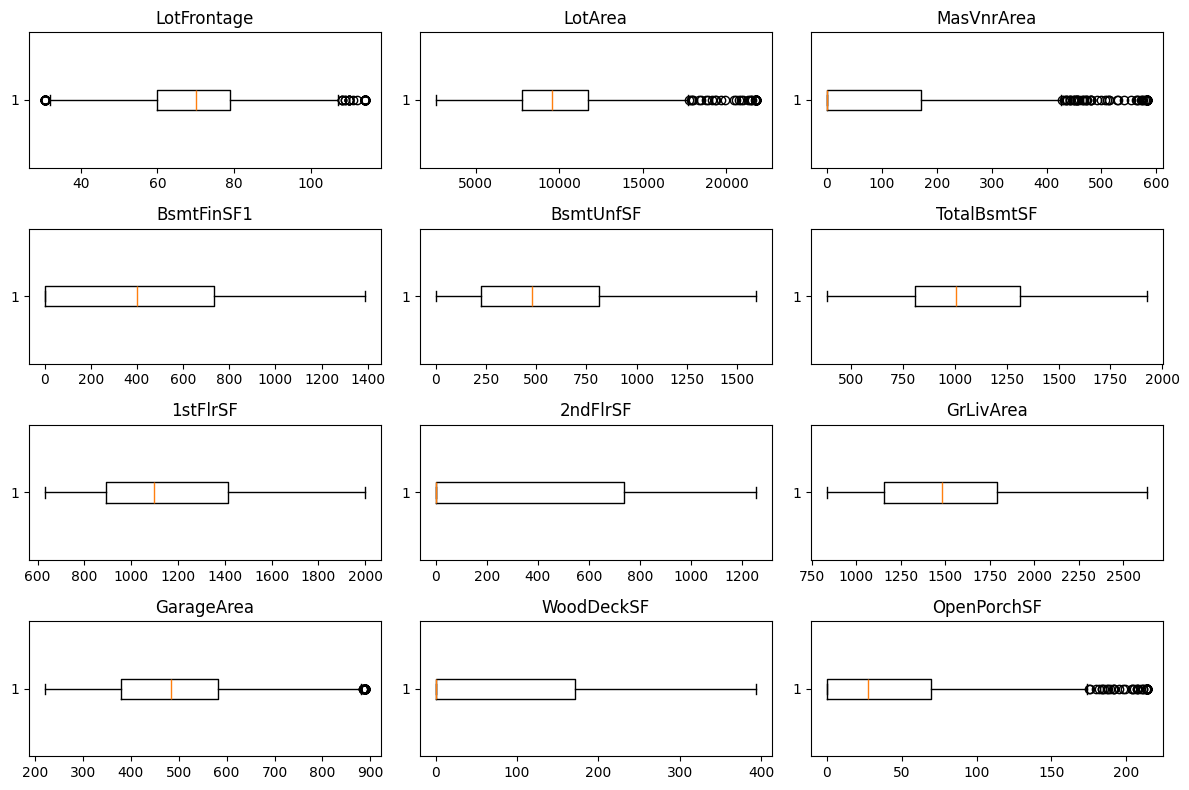

In [31]:
# create subplots with 4x3 grids and size 12x30
fig, ax = plt.subplots(4, 3, figsize=(12,8))

# counter to select outlier_columns
count = 0

# loop through the grids
for i in range(4):

    if count >= 12:
            break

    for j in range(3):

        if count >= 12:
            break
        
        # we use boxplot from pyplot
        ax[i, j].boxplot(data_capped[outlier_columns[count]], vert=False)
        ax[i, j].set_title(str(outlier_columns[count]), fontdict={'fontsize':12})

        # increment counter
        count+=1

# make sure layout is not overlapping
fig.tight_layout()
# show the graphs
fig.show()

In [32]:
#inisialisasi one hot encoder
ohe = OneHotEncoder(handle_unknown="ignore")

#copy dataset
data_ohe = copy.deepcopy(data_capped)

#fit OHE dari yg awalnya objek jadi numerik
ohe.fit(data_ohe[obj_columns])

#transform
ohe_cat = ohe.transform(data_ohe[obj_columns])

In [33]:
ohe_cat = pd.DataFrame(ohe_cat.toarray(), columns=ohe.get_feature_names_out())

In [34]:
data_ohe.drop(obj_columns, axis=1, inplace=True)

In [43]:
data_ohe

,Id,LotFrontage,LotArea,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscVal,MoSold,YrSold,SalePrice
0,1,65.0,8450.0,5,2003,2003,196.0,Gd,TA,No,...,0,0,0,0,not exist,not exist,0,2,2008,208500
1,2,80.0,9600.0,8,1976,1976,0.0,Gd,TA,Gd,...,0,0,0,0,not exist,not exist,0,5,2007,181500
2,3,68.0,11250.0,5,2001,2002,162.0,Gd,TA,Mn,...,0,0,0,0,not exist,not exist,0,9,2008,223500
3,4,60.0,9550.0,5,1915,1970,0.0,TA,Gd,No,...,272,0,0,0,not exist,not exist,0,2,2006,140000
4,5,84.0,14260.0,5,2000,2000,350.0,Gd,TA,Av,...,0,0,0,0,not exist,not exist,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,1456,62.0,7917.0,5,1999,2000,0.0,Gd,TA,No,...,0,0,0,0,not exist,not exist,0,8,2007,175000
1374,1457,85.0,13175.0,6,1978,1988,119.0,Gd,TA,No,...,0,0,0,0,not exist,MnPrv,0,2,2010,210000
1375,1458,66.0,9042.0,9,1941,2006,0.0,TA,Gd,No,...,0,0,0,0,not exist,GdPrv,2500,5,2010,266500
1376,1459,68.0,9717.0,6,1950,1996,0.0,TA,TA,Mn,...,112,0,0,0,not exist,not exist,0,4,2010,142125


In [44]:
# =====ORDINAL: Label Encoding======
#cek kolom ordinal
data_ohe[ordinal_columns].describe().T

,count,unique,top,freq
BsmtQual,1378,5,Gd,600
BsmtCond,1378,5,TA,1246
BsmtExposure,1378,5,No,895
BsmtFinType1,1378,7,GLQ,408
BsmtFinType2,1378,7,Unf,1185
HeatingQC,1378,5,Ex,720
CentralAir,1378,2,Y,1309
KitchenQual,1378,4,TA,676
GarageFinish,1378,3,Unf,605
GarageQual,1378,5,TA,1310


In [45]:
data_le = copy.deepcopy(data_ohe)

In [88]:
# six level of ordinal
six_order = ["BsmtQual", "BsmtCond", "HeatingQC", "KitchenQual", "GarageQual",
"GarageCond", "PoolQC"]
six_order_mapper = {
    "not exist": 0,
    "Po": 1,
    "Fa": 2,
    "TA": 3,
    "Gd": 4,
    "Ex": 5
}

# exposure level ordinal
exp = ["BsmtExposure"]
exp_mapper = {
    "not exist": 0,
    "No": 1,
    "Mn": 2,
    "Av": 3,
    "Gd": 4,
}

# BsmtFin level ordinal
bsmt_fin = ["BsmtFinType1", "BsmtFinType2"]
bsmt_fin_mapper = {
    "GLQ": 6,
    "ALQ": 5,
    "BLQ": 4,
    "Rec": 3,
    "LwQ": 2,
    "Unf": 1,
    "not exist": 0,
}

# CentralAir level ordinal
cnt_air = ["CentralAir"]
cnt_air_mapper = {
    "N": 0,
    "Y": 1,
}

# GarageFinisih level ordinal
grg_finish = ["GarageFinish"]
grg_finish_mapper = {
    "not exist": 0,
    "Unf": 1,
    "RFn": 2,
    "Fin": 3,
}

# PavedDrive level ordinal
pvd_drive = ["PavedDrive"]
pvd_drive_mapper = {
    "N": 0,
    "P": 1,
    "Y": 2,
}

# Fence level ordinal
fence = ["Fence"]
fence_mapper = {
    "not exist": 0,
    "MnWw": 1,
    "GdWo": 2,
    "MnPrv": 3,
    "GdPrv": 4,
}

ordinal_list = [six_order, exp, bsmt_fin, cnt_air, grg_finish, pvd_drive, fence]
mapper_list = [six_order_mapper, exp_mapper, bsmt_fin_mapper, cnt_air_mapper, grg_finish_mapper, pvd_drive_mapper, fence_mapper]

In [89]:
# are all ordinal column mapper have been defined?

len(six_order+exp+bsmt_fin+cnt_air+grg_finish+pvd_drive+fence) == len(ordinal_columns)

True

In [90]:
#membuat fungsi untuk label encoding
def le_mapper(col, map):

    data_le[col] = data_le[col].replace(map)

In [91]:
for col, mapper in zip(ordinal_list, mapper_list):
    le_mapper(col, mapper)

In [92]:
data_le[ordinal_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
BsmtQual,1378.0,3.522496,0.856350,0.0,3.0,4.0,4.0,5.0
BsmtCond,1378.0,2.951379,0.519582,0.0,3.0,3.0,3.0,4.0
BsmtExposure,1378.0,1.645864,1.068184,0.0,1.0,1.0,2.0,4.0
BsmtFinType1,1378.0,3.605225,2.098387,0.0,1.0,4.0,6.0,6.0
BsmtFinType2,1378.0,1.256168,0.889939,0.0,1.0,1.0,1.0,6.0
HeatingQC,1378.0,4.174891,0.950042,1.0,3.0,5.0,5.0,5.0
CentralAir,1378.0,0.949927,0.218174,0.0,1.0,1.0,1.0,1.0
KitchenQual,1378.0,3.545718,0.652140,2.0,3.0,3.0,4.0,5.0
GarageFinish,1378.0,1.815675,0.812565,1.0,1.0,2.0,3.0,3.0
GarageQual,1378.0,2.975327,0.248687,1.0,3.0,3.0,3.0,5.0


In [93]:
X = data_le.drop(["Id", "SalePrice"], axis=1)
y = data_le.SalePrice

In [94]:
data_le['Fence']

0       0
1       0
2       0
3       0
4       0
       ..
1373    0
1374    3
1375    4
1376    0
1377    0
Name: Fence, Length: 1378, dtype: int64

In [95]:
from sklearn.ensemble import RandomForestRegressor

In [96]:
rf = RandomForestRegressor()

In [97]:
rf.fit(X, y)

RandomForestRegressor()

In [98]:
y_pred = rf.predict(X)

In [99]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

print("MAE:",mean_absolute_error(y, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y, y_pred)))
print("R2:",r2_score(y, y_pred))


MAE: 6831.657728592164
RMSE: 11781.82639602532
R2: 0.9777707530876554


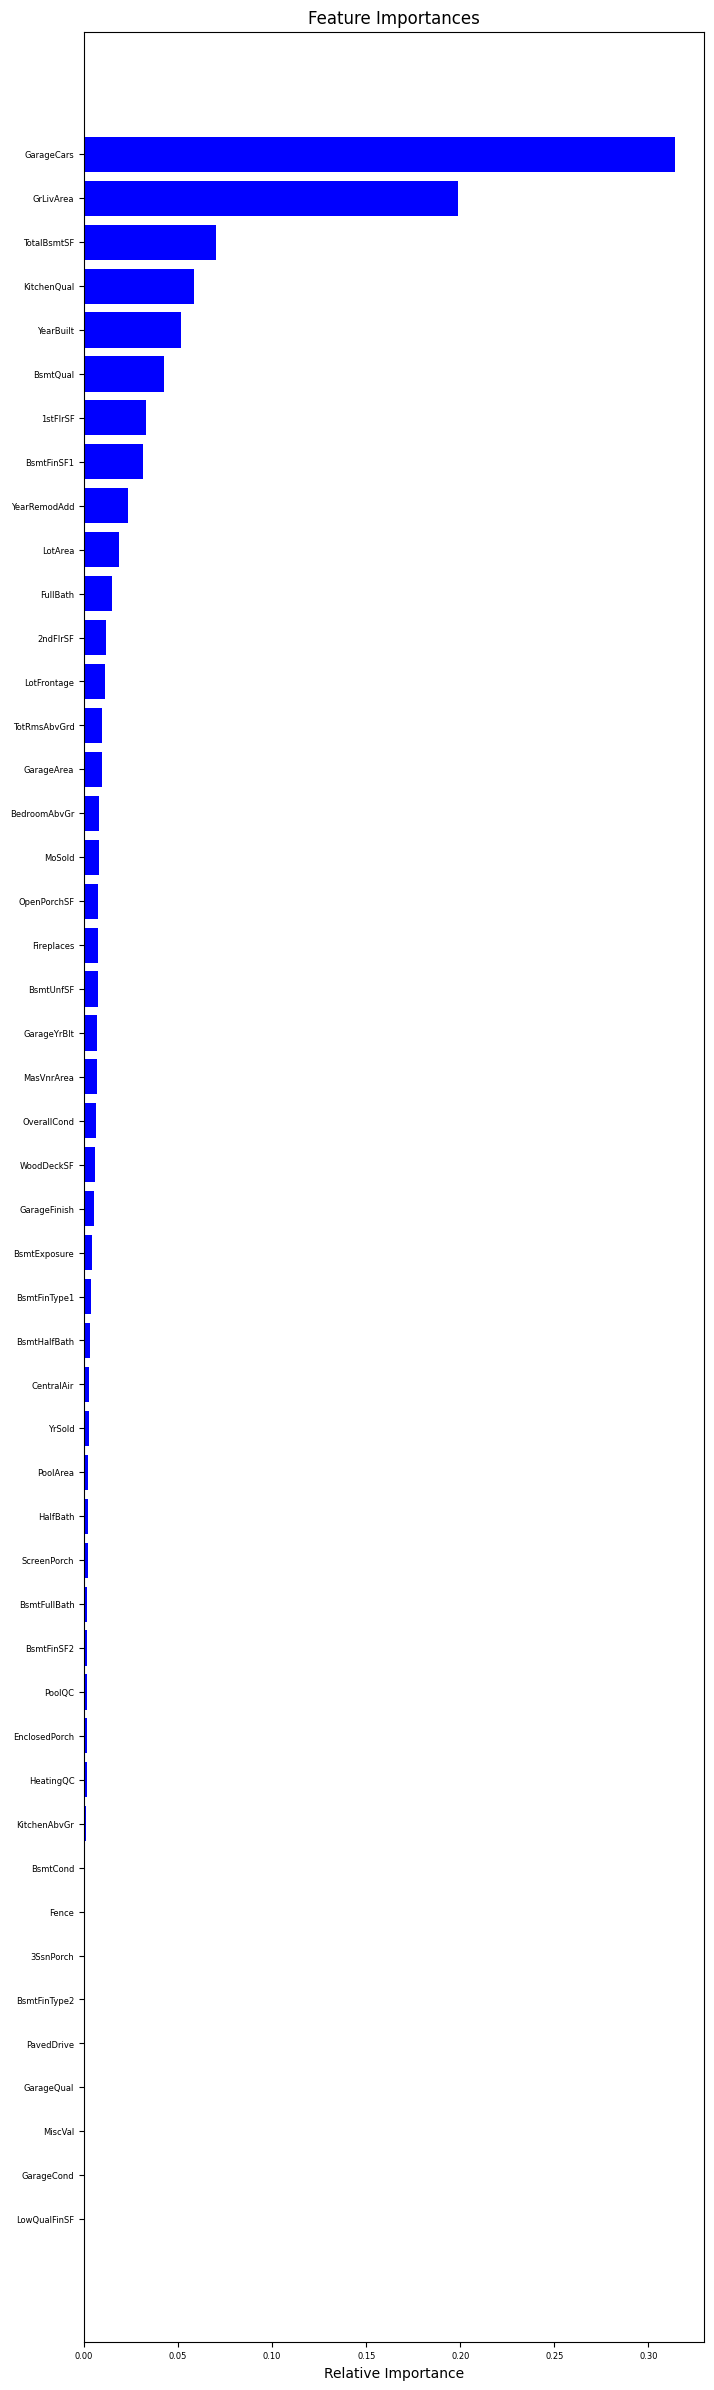

In [100]:
features = list(X.columns)
importances = rf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8,30))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.tick_params(axis='both', which='major', labelsize=6)
plt.show()